In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from collections import Counter
import pandas as pd
import math

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
d = {'setosa':0, 'versicolor':1, 'virginica':2}
iris['species']=iris['species'].map(d)

In [5]:
iris = iris.sample(frac=1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
19,5.1,3.8,1.5,0.3,0
82,5.8,2.7,3.9,1.2,1
110,6.5,3.2,5.1,2.0,2
116,6.5,3.0,5.5,1.8,2
77,6.7,3.0,5.0,1.7,1
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,2
113,5.7,2.5,5.0,2.0,2
145,6.7,3.0,5.2,2.3,2
137,6.4,3.1,5.5,1.8,2


In [6]:
X = iris.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
19,5.1,3.8,1.5,0.3
82,5.8,2.7,3.9,1.2
110,6.5,3.2,5.1,2.0
116,6.5,3.0,5.5,1.8
77,6.7,3.0,5.0,1.7
...,...,...,...,...
122,7.7,2.8,6.7,2.0
113,5.7,2.5,5.0,2.0
145,6.7,3.0,5.2,2.3
137,6.4,3.1,5.5,1.8


In [7]:
Y = iris.iloc[:,4]
Y

19     0
82     1
110    2
116    2
77     1
      ..
122    2
113    2
145    2
137    2
97     1
Name: species, Length: 150, dtype: int64

In [8]:
X_train = np.array(X.iloc[0:120, :])
X_train

array([[5.1, 3.8, 1.5, 0.3],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3. , 5. , 1.7],
       [4.8, 3.4, 1.9, 0.2],
       [6. , 2.2, 5. , 1.5],
       [5.9, 3. , 4.2, 1.5],
       [4.9, 3.1, 1.5, 0.1],
       [5.3, 3.7, 1.5, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 3.7, 1.5, 0.4],
       [6.3, 2.3, 4.4, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [4.8, 3. , 1.4, 0.3],
       [4.6, 3.6, 1. , 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.7, 1.5, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.8, 5.6, 2.2],
       [5.5, 3.5, 1.3, 0.2],
       [6. , 2.7, 5.1, 1.6],
       [5. , 2.3, 3.3, 1. ],
       [6. , 2.9, 4.5, 1.5],
       [7. , 3.2, 4.7, 1.4],
       [6.8, 3.2, 5.9, 2.3],
       [6. , 3. , 4.8, 1.8],
       [6.1, 2.9, 4.7, 1.4],
       [5.1, 3.8, 1.9, 0.4],
       [5.1, 3.8, 1.6, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 2.9, 5.6, 1.8],
       [6.4, 2.9, 4.3, 1.3],
       [6.1, 2

In [9]:
Y_train=np.array(Y.iloc[0:120])
Y_train[:10]

array([0, 1, 2, 2, 1, 0, 2, 1, 0, 0], dtype=int64)

In [10]:
X_test=np.array(X.iloc[120:])
X_test[:10]

array([[5.5, 2.3, 4. , 1.3],
       [5.1, 2.5, 3. , 1.1],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 2.2, 4. , 1. ],
       [4.3, 3. , 1.1, 0.1],
       [7.7, 3. , 6.1, 2.3],
       [4.8, 3. , 1.4, 0.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 3.3, 4.7, 1.6],
       [5.1, 3.3, 1.7, 0.5]])

In [11]:
Y_test = np.array(Y.iloc[120:])
Y_test[:10]

array([1, 1, 2, 1, 0, 2, 0, 1, 1, 0], dtype=int64)

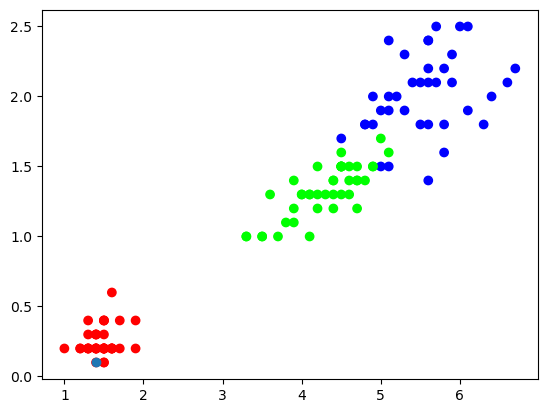

In [12]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.figure()
plt.scatter(X_train[:,2],X_train[:,3],c=Y_train, cmap=cmap)
plt.scatter(X_test[6,2],X_test[6,3])
plt.show()

In [13]:
def euclidean_distance(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [14]:
def _predict_one(x,X_train,Y_train,k):
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    #print(distances)
    print('**********')
    
    k_indices = np.argsort(distances)[:k]
    #print("k_indices: ",k_indices)
    k_nearest_labels = [Y_train[i] for i in k_indices]
    print("k_nearest_labels: ",k_nearest_labels)
    
    mostCommon = Counter(k_nearest_labels).most_common()
    print("mostCommon: ",mostCommon)
    
    return mostCommon[0]                                         #return the first tuple from mostCommon for each row.

In [15]:
err=0.0
def mse(mostCommon, i, err):
    a,b = mostCommon        #unpacking the tuple(a,b)
    err += ((a - Y_test[i])**2) / (len(Y_test))

In [16]:
mse3 = []
acc3 = []
for i in range(len(X_test)):
    mostCommon = _predict_one(X_test[i,:],X_train,Y_train,3)
    mse(mostCommon,i,err)
    mse3.append(err)
    try:
        accuracy = 1 / math.sqrt(err)
    except ZeroDivisionError:
        accuracy = 1
    acc3.append(accuracy)
    print("MSE: " + str(err) + "\tAccuracy: " + str(accuracy))

**********
k_nearest_labels:  [1, 1, 1]
mostCommon:  [(1, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1]
mostCommon:  [(1, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 2]
mostCommon:  [(2, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1]
mostCommon:  [(1, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0]
mostCommon:  [(0, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 2]
mostCommon:  [(2, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0]
mostCommon:  [(0, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 1]
mostCommon:  [(2, 2), (1, 1)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1]
mostCommon:  [(1, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0]
mostCommon:  [(0, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0]
mostCommon:  [(0, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0]
mostCommon:  [(0, 3)]
MSE: 0.0	Accuracy

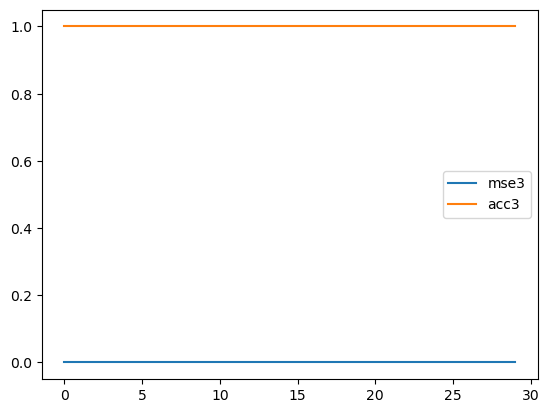

In [17]:
plt.plot(mse3,label='mse3')
plt.plot(acc3,label='acc3')
plt.legend()

In [18]:
mse5 = []
acc5 = []
for i in range(len(X_test)):
    mostCommon = _predict_one(X_test[i,:],X_train,Y_train,5)
    mse(mostCommon,i,err)
    mse5.append(err)
    try:
        accuracy = 1 / math.sqrt(err)
    except ZeroDivisionError:
        accuracy = 1
    acc5.append(accuracy)
    print("MSE: " + str(err) + "\tAccuracy: " + str(accuracy))

**********
k_nearest_labels:  [1, 1, 1, 1, 1]
mostCommon:  [(1, 5)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1, 1, 1]
mostCommon:  [(1, 5)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 2, 2, 2]
mostCommon:  [(2, 5)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1, 1, 1]
mostCommon:  [(1, 5)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0, 0, 0]
mostCommon:  [(0, 5)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 2, 2, 2]
mostCommon:  [(2, 5)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0, 0, 0]
mostCommon:  [(0, 5)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 1, 2, 1]
mostCommon:  [(2, 3), (1, 2)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1, 2, 1]
mostCommon:  [(1, 4), (2, 1)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0, 0, 0]
mostCommon:  [(0, 5)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0, 0, 0]
mostCommon:  [(0, 5)]
MSE: 0.0	Accuracy: 1
*****

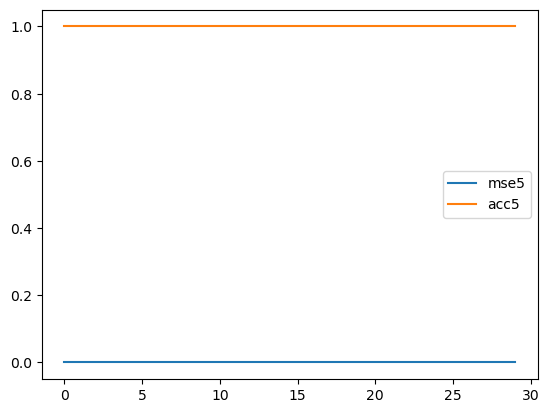

In [19]:
plt.plot(mse5,label='mse5')
plt.plot(acc5,label='acc5')
plt.legend()

In [20]:
mse7 = []
acc7 = []
for i in range(len(X_test)):
    mostCommon = _predict_one(X_test[i,:],X_train,Y_train,7)
    mse(mostCommon,i,err)
    mse7.append(err)
    try:
        accuracy = 1 / math.sqrt(err)
    except ZeroDivisionError:
        accuracy = 1
    acc7.append(accuracy)
    print("MSE: " + str(err) + "\tAccuracy: " + str(accuracy))

**********
k_nearest_labels:  [1, 1, 1, 1, 1, 1, 1]
mostCommon:  [(1, 7)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1, 1, 1, 1, 1]
mostCommon:  [(1, 7)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 2, 2, 2, 2, 2]
mostCommon:  [(2, 7)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1, 1, 1, 1, 1]
mostCommon:  [(1, 7)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0, 0, 0, 0, 0]
mostCommon:  [(0, 7)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 2, 2, 2, 2, 2]
mostCommon:  [(2, 7)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0, 0, 0, 0, 0]
mostCommon:  [(0, 7)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [2, 2, 1, 2, 1, 1, 1]
mostCommon:  [(1, 4), (2, 3)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [1, 1, 1, 2, 1, 2, 1]
mostCommon:  [(1, 5), (2, 2)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 0, 0, 0, 0, 0, 0]
mostCommon:  [(0, 7)]
MSE: 0.0	Accuracy: 1
**********
k_nearest_labels:  [0, 

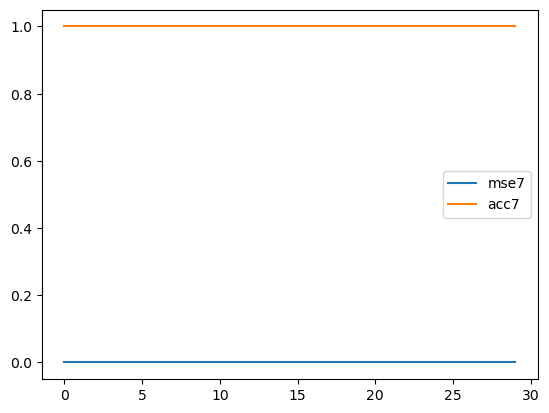

In [21]:
plt.plot(mse7,label='mse7')
plt.plot(acc7,label='acc7')
plt.legend()